#### Import libraries and set visualization options

In [7]:
# Import libraries
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Set visualization options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

#### Create analysis folders

In [8]:
# Define function for creating analysis folders
def create_analysis_folder(operating_system, project_name, analysis_name):
	
	# Set path to BSC folder for mac, linux and windows
	if operating_system == 'windows':
		pathToBSCfolder = 'Z:\\'
	elif operating_system == 'linux':
		pathToBSCfolder = os.path.join('/home','amontaner','BSC')
	elif operating_system == 'mac':
		pathToBSCfolder = os.path.join('/Users','annamontaner','Documents','BSC3')
	else:
		print ('undefined operating system') 
	
	# Path to project folder 
	project_folder = os.path.join('scratch','cli79','cli79334','projects', 'other', project_name)


   # Create analysis folder and subfolders 
	analysis_folder = os.path.join(pathToBSCfolder, project_folder, analysis_name)
	analysis_info_folder = os.path.join(analysis_folder,'analysis_info')
	intermediate_folder = os.path.join(analysis_folder,'intermediate_files')
	assets_folder = os.path.join(analysis_folder,'assets')
	final_folder = os.path.join(analysis_folder,'final_files')


	folder_list = [analysis_folder,
				   analysis_info_folder, 
				   assets_folder, 
				   intermediate_folder, 
				   final_folder]

	if not os.path.exists(analysis_folder):
		for items in folder_list:
			os.makedirs(items)
		print("Analysis folder and subfolders created '{}' created".format(analysis_name))
	else: 
		print("Already existing analysis '{}' ".format(analysis_name))

	return(analysis_folder)

#### Create analysis folders

In [9]:
# Create analysis folders
analysis_folder = create_analysis_folder('mac','AFR_ARSA_FedorovaL', '03_FedorovaL_annotated_data_exploration')	

Already existing analysis '03_FedorovaL_annotated_data_exploration' 


#### Import data

In [10]:
# Define function
def import_annotated_data(annotation_folder, tsvFile):
  
       
    # Import data
    data = pd.read_csv(os.path.join(annotation_folder, tsvFile), sep='\t', low_memory=False)
    
    # Data types conversion: AQUÍ CALDRÀ AFEGIR QUE PER A hg38 HEM DE CONVERTIR LA COLUMNA DELS 1000GENOMES hg38
    colsToConvert = ['AF','AC','NS','AN','EAS_AF','EUR_AF','AFR_AF','AMR_AF','SAS_AF', 'dbNSFP_1000Gp3_AF', 'dbNSFP_1000Gp3_EUR_AF', 'dbNSFP_1000Gp3_AFR_AF', 'dbNSFP_1000Gp3_AMR_AF', 'dbNSFP_1000Gp3_EAS_AF', 'dbNSFP_1000Gp3_SAS_AF', 'dbNSFP_ESP6500_EA_AF', 'dbNSFP_ESP6500_AA_AF', 'dbNSFP_ExAC_AF', 'dbNSFP_ExAC_NFE_AF', 'dbNSFP_ExAC_AFR_AF', 'dbNSFP_ExAC_AMR_AF', 'dbNSFP_ExAC_EAS_AF', 'dbNSFP_ExAC_FIN_AF', 'dbNSFP_ExAC_SAS_AF', 'dbNSFP_ExAC_Adj_AF', 'dbNSFP_gnomAD_exomes_AF', 'dbNSFP_gnomAD_exomes_NFE_AF', 'dbNSFP_gnomAD_genomes_AF', 'dbNSFP_gnomAD_genomes_NFE_AF']
    data[colsToConvert] = data[colsToConvert].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    return(data)

In [11]:
# Import 1kGPhg38 snpEff annotated and biotype filtered data
d = import_annotated_data(analysis_folder,'mutations_Fedorova_test1.tsv')

In [12]:
ARSAfedorova = d.copy()

### Explore annotated biotypes and effects

/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


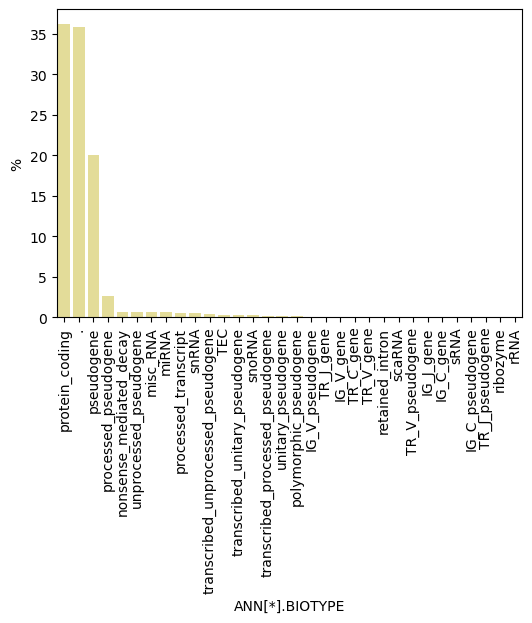

In [13]:
group = ARSAfedorova.groupby(['ANN[*].BIOTYPE']).size().reset_index(name='count')

# Calculate percentages
group['percentage'] = (group['count'] / group['count'].sum()) * 100

# Order 
group = group.sort_values('percentage',ascending=False)

# Export table
group.to_csv(os.path.join(analysis_folder,'assets','annotated_biotypes_Fedorova.tsv'), index=False)

# Plot
plt.figure(figsize=(6, 4))

sns.barplot(group, x="ANN[*].BIOTYPE", y='percentage', color = 'khaki')
plt.xticks(rotation=90) 
plt.xlabel("ANN[*].BIOTYPE")
plt.ylabel("%")

plt.savefig(os.path.join(analysis_folder,'assets','annotated_biotypes_Fedorova.pdf'), dpi=300)
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


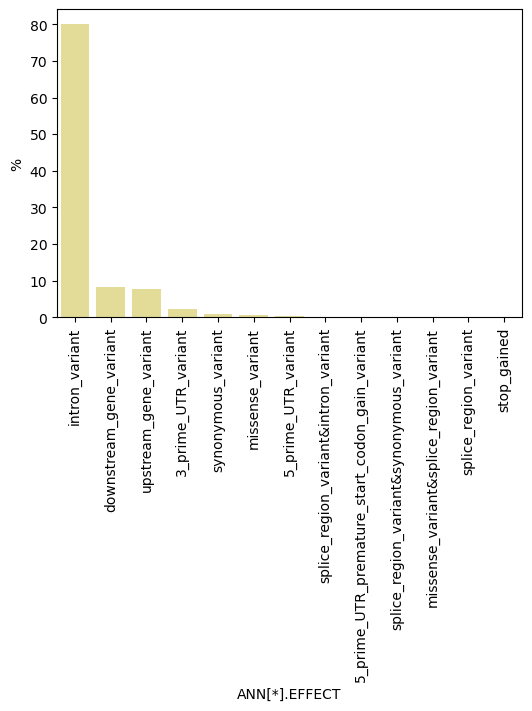

In [14]:
# Select Fedorova protein coding
fedorova_protein_coding = ARSAfedorova[ARSAfedorova['ANN[*].BIOTYPE']=='protein_coding']
fedorova_protein_coding.shape[0]

group = fedorova_protein_coding.groupby(['ANN[*].EFFECT']).size().reset_index(name='count')

# Calculate percentages
group['percentage'] = (group['count'] / group['count'].sum()) * 100

# Order 
group = group.sort_values('percentage',ascending=False)

# Export table
group.to_csv(os.path.join(analysis_folder,'assets','annotated_effects_protein_coding_Fedorova.tsv'), index=False)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(group, x="ANN[*].EFFECT", y='percentage', color = 'khaki')
plt.xticks(rotation=90) 
plt.xlabel("ANN[*].EFFECT")
plt.ylabel("%")

plt.savefig(os.path.join(analysis_folder,'assets','annotated_effects_protein_coding_Fedorova.pdf'), dpi=300)
plt.show()


#### Calculate overrepresentation

In [18]:
# Calculate maximum freq
alleleFreqs = ['EAS_AF','EUR_AF','AMR_AF','SAS_AF']
ARSAfedorova['maxFreqs'] = ARSAfedorova[alleleFreqs].max(axis=1)
ARSAfedorova['AFR_overrepresentation'] = ARSAfedorova['AFR_AF'].divide(ARSAfedorova['maxFreqs'])

# Replace nan values by 0 (Ex. AF_AFR = 0 and maxFreqs = 0)
ARSAfedorova['AFR_overrepresentation_mod'] = ARSAfedorova['AFR_overrepresentation'].replace({np.nan:0, np.inf:50})

# Convert to discrete number
AFR_overrepresentation_label0 = [round(x) for x in ARSAfedorova['AFR_overrepresentation_mod']]

# Add label
data = ARSAfedorova.assign(AFR_overrepresentation_label = AFR_overrepresentation_label0)

In [26]:
ARSAfedorova

SAMPLE  CHROM       POS REF ALT  \
0       ARSAtableAFR_hg38_sorted_ann      1    914061   A   G   
1       ARSAtableAFR_hg38_sorted_ann      1    914061   A   G   
2       ARSAtableAFR_hg38_sorted_ann      1    914061   A   G   
3       ARSAtableAFR_hg38_sorted_ann      1    914061   A   G   
4       ARSAtableAFR_hg38_sorted_ann      1    914527   C   T   
...                              ...    ...       ...  ..  ..   
101404  ARSAtableAFR_hg38_sorted_ann     22  50536840   A   T   
101405  ARSAtableAFR_hg38_sorted_ann     22  50536859   A   G   
101406  ARSAtableAFR_hg38_sorted_ann     22  50536859   A   G   
101407  ARSAtableAFR_hg38_sorted_ann     22  50536859   A   G   
101408  ARSAtableAFR_hg38_sorted_ann     22  50640571   C   G   

                  ANN[*].GENE                    ANN[*].GENEID  \
0             ENSG00000241180                  ENSG00000241180   
1                   LINC02593                  ENSG00000223764   
2             ENSG00000272438                  ENSG00000272438   
3             ENSG00000230699                  ENSG00000230699   
4                   LINC02593                  ENSG00000223764   
...                       ...                              ...   
101404  ODF3B-ENSG00000273272  ENSG00000177989-ENSG00000273272   
101405                  ODF3B                  ENSG00000177989   
101406        ENSG00000273272                  ENSG00000273272   
101407  ODF3B-ENSG00000273272  ENSG00000177989-ENSG00000273272   
101408  ENSG00000289244-Y_RNA  ENSG00000289244-ENSG00000212569   

           ANN[*].FEATURE                 ANN[*].FEATUREID  ANN[*].BIOTYPE  \
0              transcript                ENST00000398216.2      pseudogene   
1              transcript                ENST00000417705.1      pseudogene   
2              transcript                ENST00000607769.1      pseudogene   
3              transcript                ENST00000448179.1      pseudogene   
4              transcript                ENST00000417705.1      pseudogene   
...                   ...                              ...             ...   
101404  intergenic_region  ENSG00000177989-ENSG00000273272               .   
101405         transcript                ENST00000329363.9  protein_coding   
101406         transcript                ENST00000609268.2      pseudogene   
101407  intergenic_region  ENSG00000177989-ENSG00000273272               .   
101408  intergenic_region  ENSG00000289244-ENSG00000212569               .   

                             ANN[*].EFFECT ANN[*].IMPACT  ANN[*].RANK  \
0                    upstream_gene_variant      MODIFIER           -1   
1                  downstream_gene_variant      MODIFIER           -1   
2                           intron_variant      MODIFIER            1   
3       non_coding_transcript_exon_variant      MODIFIER            2   
4                  downstream_gene_variant      MODIFIER           -1   
...                                    ...           ...          ...   
101404                   intergenic_region      MODIFIER           -1   
101405               upstream_gene_variant      MODIFIER           -1   
101406               upstream_gene_variant      MODIFIER           -1   
101407                   intergenic_region      MODIFIER           -1   
101408                   intergenic_region      MODIFIER           -1   

        ANN[*].HGVS_C ANN[*].HGVS_P  ANN[*].CDNA_POS  ANN[*].CDNA_LEN  \
0           n.-110A>G             .               -1               -1   
1          n.*2809T>C             .               -1               -1   
2       n.125-1689A>G             .               -1               -1   
3           n.2156A>G             .               -1               -1   
4          n.*2343G>A             .               -1               -1   
...               ...           ...              ...              ...   
101404  n.50536840A>T             .               -1               -1   
101405     c.-4417T>C             .               -1      

### Plot AF and overrepresentation distribution

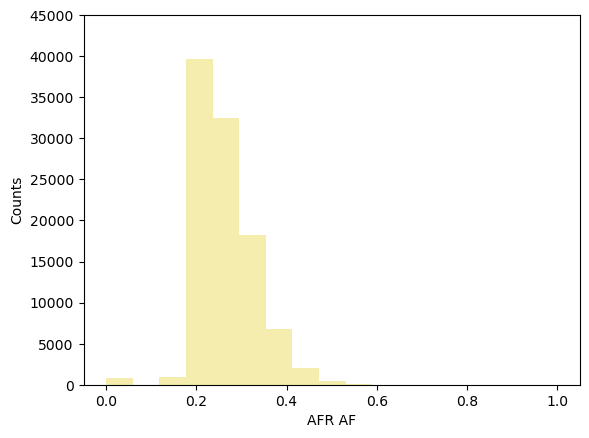

In [22]:
# Freq histogram full dataset for each value X 
plt.hist(ARSAfedorova['AFR_AF'], bins=10, color='khaki', alpha=0.7)

plt.ylim(0,45000)
plt.xlim(-0.05,1.05)

# Add labels and a title
plt.xlabel('AFR AF')
plt.ylabel('Counts')
#plt.title('Abundant in the African superpopulation')

# Add a label to the plot
label_x = 0.72  # X-coordinate for the label
label_y = 28000   # Y-coordinate for the label
label_text = "Total SNVs: " + str(ARSAfedorova.shape[0])
#plt.text(label_x, label_y, label_text, fontsize=10, color='black')


# Display the histogram
plt.show()

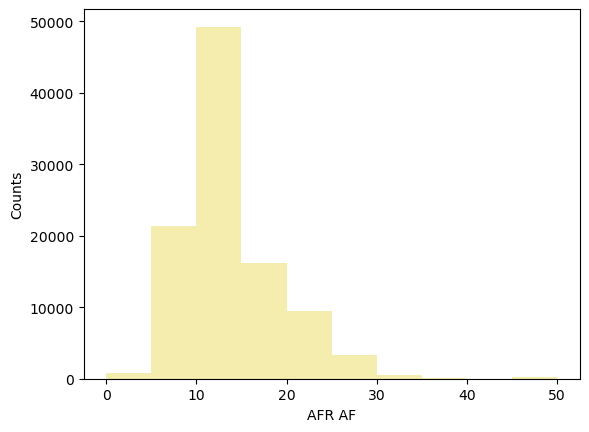

In [28]:
# Freq histogram full dataset for each value X 
plt.hist(ARSAfedorova['AFR_overrepresentation_mod'], bins=10, color='khaki', alpha=0.7)

#plt.ylim(0,45000)
#plt.xlim(-0.05,1.05)

# Add labels and a title
plt.xlabel('Overrepresentation')
plt.ylabel('Counts')
#plt.title('Abundant in the African superpopulation')

# Add a label to the plot
label_x = 0.72  # X-coordinate for the label
label_y = 28000   # Y-coordinate for the label
label_text = "Total SNVs: " + str(ARSAfedorova.shape[0])
#plt.text(label_x, label_y, label_text, fontsize=10, color='black')


# Display the histogram
plt.show()